In [5]:
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import folium
import branca

import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline

In [6]:
df.loc[(df.neighbourhood=='Queen Anne') & (df.bedrooms==3) & (df.bathrooms==3.5) & (df.room_type=='Entire home/apt'),:].price

NameError: name 'df' is not defined

### FOLIUM MAP

In [7]:
# read the data and create aggregate column with mean price by neighbourhood_group_cleansed
df= pd.read_csv("listings.csv")

# remove na
df.dropna(subset=['neighbourhood_group_cleansed'],inplace=True)

df['price'] = df['price'].apply(lambda c: re.sub('[^a-zA-Z0-9]','',c).strip(' ')).astype('int')
df['mean_']=df.groupby('neighbourhood_group_cleansed')['price'].transform(lambda r : r.mean())


In [8]:
# create the base map for Seattle
seattle_map = folium.Map(
    location = [47.6062, -122.3321],
    tiles = 'CartoDB positron',
    zoom_start =11
)

In [9]:
# create a color scale : you can find more in https://python-visualization.github.io/branca/colormap.html
colorscale = branca.colormap.linear.Reds_08.scale(0, 20000)

for i in range(len(df)):
    # add markers for each data point
    folium.CircleMarker(
        location = [df.latitude.iloc[i], df.longitude.iloc[i]],
        radius = 1,
        popup = df.mean_.iloc[i],
        color = colorscale(df.mean_.iloc[i]),
        fill=False).add_to(seattle_map) 

folium.LayerControl().add_to(seattle_map)    
seattle_map

In [11]:
# save the map as html
seattle_map.save('map.html')

#### GEOPANDAS MAP

/Users/ayomidealabi/miniforge3/envs/data-science/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/wp/s6hl_fl57tnf8_1_ndx9w4hw0000gn/T/ipykernel_91755/1448613571.py:26: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


<Axes: >

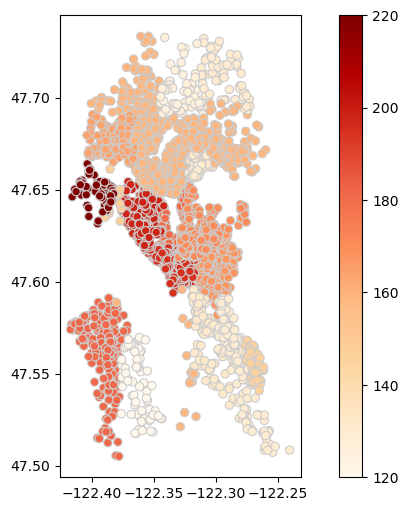

In [12]:
# read data
df= pd.read_csv("listings.csv")

df.dropna(subset=['neighbourhood_group_cleansed'],inplace=True)
# read coordinates from data
geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
df = df.drop(columns=['latitude', 'longitude'], axis=1)

# generate aggregation column mean orice by neighbourhood_group_cleansed

df['price'] = df['price'].apply(lambda c: re.sub('[^a-zA-Z0-9]','',c).strip(' ')).astype('int')
df['mean_']=df.groupby('neighbourhood_group_cleansed')['price'].transform(lambda r : r.mean())

crs = {'init': 'epsg:4326'}
# create geodataframe
gdf = GeoDataFrame(df, crs=crs, geometry=geometry)

fig, ax = plt.subplots(1, figsize=(10, 6))
vmin, vmax = 120, 220

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
gdf.plot(column='mean_', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

/Users/ayomidealabi/miniforge3/envs/data-science/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/wp/s6hl_fl57tnf8_1_ndx9w4hw0000gn/T/ipykernel_91755/3970958740.py:26: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


<Axes: >

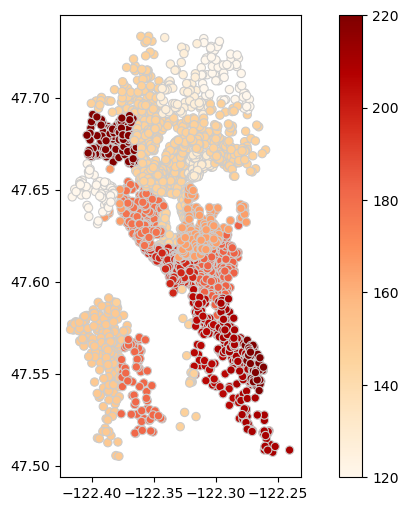

In [13]:
# read data
df= pd.read_csv("listings.csv")

df.dropna(subset=['neighbourhood_group_cleansed'],inplace=True)
# read coordinates from data
geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
df = df.drop(columns=['latitude', 'longitude'], axis=1)

# generate aggregation column mean orice by neighbourhood_group_cleansed

# df['price'] = df['price'].apply(lambda c: re.sub('[^a-zA-Z0-9]','',c).strip(' ')).astype('int')
df['mean_']=df.groupby('neighbourhood_group_cleansed')['reviews_per_month'].transform(lambda r : r.mean())

crs = {'init': 'epsg:4326'}
# create geodataframe
gdf = GeoDataFrame(df, crs=crs, geometry=geometry)

fig, ax = plt.subplots(1, figsize=(10, 6))
vmin, vmax = 120, 220

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
gdf.plot(column='mean_', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')

/Users/ayomidealabi/miniforge3/envs/data-science/lib/python3.8/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/wp/s6hl_fl57tnf8_1_ndx9w4hw0000gn/T/ipykernel_91755/2772475208.py:28: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


<Axes: >

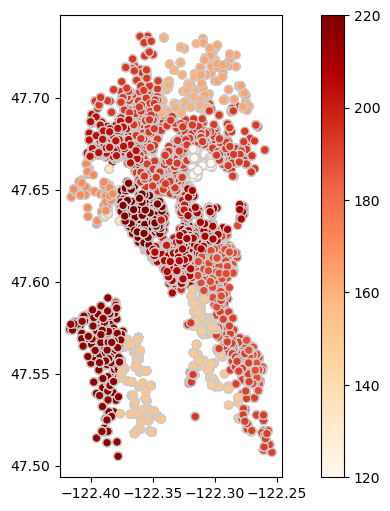

In [15]:
listings = pd.read_csv("listings.csv")
reviews = pd.read_csv("reviews_with_polarity.csv")
# get review average for each listing
df = reviews.merge(listings, left_on='listing_id', right_on='id')

df.dropna(subset=['neighbourhood_group_cleansed'],inplace=True)
# read coordinates from data
geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
df = df.drop(columns=['latitude', 'longitude'], axis=1)

# generate aggregation column mean orice by neighbourhood_group_cleansed

# df['price'] = df['price'].apply(lambda c: re.sub('[^a-zA-Z0-9]','',c).strip(' ')).astype('int')
df['mean_']=df.groupby('neighbourhood_group_cleansed')['polarity'].transform(lambda r : r.mean()/100)

crs = {'init': 'epsg:4326'}
# create geodataframe
gdf = GeoDataFrame(df, crs=crs, geometry=geometry)

fig, ax = plt.subplots(1, figsize=(10, 6))
vmin, vmax = 120, 220

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)
gdf.plot(column='mean_', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8')
